# Assignment 2: Data Cleaning (Imputation Checker)
- Group Number: A-129
- Name: Uzair Mohiuddin
- Student Number: 8737165

## Dataset: Coffee Shop Daily Revenue Prediction Dataset
- Dataset: Coffee Shop Daily Revenue Prediction Dataset
- Source: [Kaggle Link](https://www.kaggle.com/datasets/himelsarder/coffee-shop-daily-revenue-prediction-dataset)
- Rows and Columns: 2000 rows x 7 columns

### Description
- **Name**: Coffee Shop Daily Revenue Prediction Dataset
- **Author**: Himel Sarder
- **Purpose**: The purpose of the dataset is to analyze data from coffee shps to understand different factors impacting revenue. The dataset includes operational and environmental variables to understand how different factors can impact sales performance. 
- **Shape**: 2000 rows x 7 columns
- **Features of Dataset**:
  | Feature                     | Categorical/Numerical | Description                              |   
  | --------------------------- | --------------------- | ---------------------------------------- |
  | Number_of_Customers_Per_Day |  Numerical (int64)    | Total number of cusomters visiting on a given day (Range: 50 - 500). |
  | Average_Order_Value         |  Numerical (float64)  | Average dollar amount spent by each customer during their visit (Range: $2.50 - $10.00). |
  | Operating_Hours_Per_Day     |  Numerical (int64)    | Total number of hours open for each day (Range 6 - 18 hours). |
  | Number_of_Employees         |  Numerical (int64)    | Number of employees working on a given day (Rane 2 - 15). |
  | Marketing_Spend_Per_Day     |  Numerical (float64)  | Amount of money spent on marketing campaigns on a given day (Range: $10-$500 per day). | 
  | Location_Foot_Traffic       |  Numerical (int64)    | Number of people passing by per hour (50 - 1000 people per hour). |
  | Daily_Revenue               |  Numerical (float64)  | Target variable - total revenue generated each day (Range: $200 - $10,000 per day). |


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, Markdown
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import KNNImputer

In [2]:
# URL for dataset
coffee_shop_revenue_url = "https://raw.githubusercontent.com/uzaaaiiir/jupyter/refs/heads/main/intro_ds_assignments/assignment2/coffee_shop_revenue.csv"

# Load dataset
df = pd.read_csv(coffee_shop_revenue_url)

In [3]:
df.shape

(2000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [5]:
'''
describe() to retrieve numerical attributes.

Numerical attributes are: all attributes are numerical. 
'''
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [6]:
'''
Categorical attributes of the dataset.

Categorical attributes are: No categorical attributes
'''
if df.select_dtypes(include=['object']).empty:
    print("No categorical attributes in the dataset.")
else:
    df.describe(include="object")

No categorical attributes in the dataset.


In [7]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


# Imputation Method 1: Correlational Imputation (Bivariate)
Correlational imputation involves using correlations between numerical attributes to impute data.

## Missing At Random (MAR)
Missing at Random refers to when values are missing in relation to other variables. The reason the value is missing is not due to the actual attribute value. 

## Attribute: Number_of_Customers_Per_Day
Below, we've plotted a heatmap showing a strong correlation between `Number_of_Customers_Per_Day` and `Daily_Revenue`. Based on this, <u>we can remove values for `Number_of_Customers_Per_Day`, where `Daily_Revenue` is low</u>. This is based on the assumption that shops with a low revenue don't want to say that there is a low number of customers coming daily. 

### Approach
- We will remove values from `Number_of_Customers_Per_Day` attribute where `Daily_Revenue` is low.
- We will use a T-Test to verify the correlation between attributes, so we can test our hypotehsis that values are missing in relation to other attributes.
- We will impute using a linear correlational imputation. 

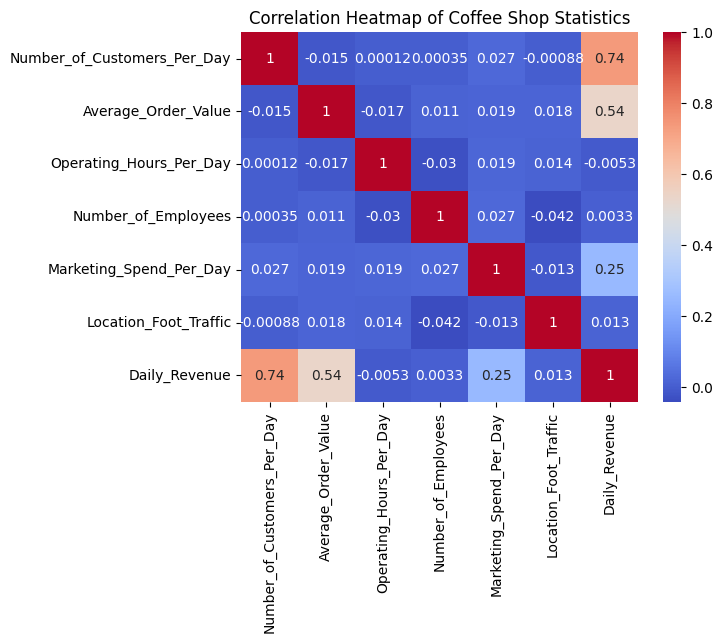

In [8]:
# View the correlations between attributes.
numeric_df = df.select_dtypes(include=["float64", "int64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Coffee Shop Statistics")
plt.show()

In [9]:
'''
Simulate missing values by removing Number_of_Customers_Per_Day where 
the Daily_Revenue is in the lower quantile.
'''
df_copy = df.copy(deep = True)

lowest_quantile_revenue = df_copy['Daily_Revenue'].quantile(0.25)
df_copy.loc[df_copy['Daily_Revenue'] <= lowest_quantile_revenue, 'Number_of_Customers_Per_Day'] = np.nan

# Check percentage of missing values - we see 500 values missing now for `Number_of_Customers_Per_Day`
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  1500 non-null   float64
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 109.5 KB


In [10]:
'''
Use T-Test to verify correlation between values, and see which numerical attribute
may relate to the missing value.
'''
attributes = [
    'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees',
    'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'
]

t_test_results = {}


for attribute in attributes:
    missing = df_copy[df_copy['Number_of_Customers_Per_Day'].isnull()][attribute]
    not_missing = df_copy[df_copy['Number_of_Customers_Per_Day'].notnull()][attribute]

    # t-test
    t_stat, p_value = stats.ttest_ind(missing, not_missing, equal_var=False, nan_policy='omit')

    # results
    t_test_results[attribute] = { 't-stat': t_stat, 'p-value': p_value}

t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')
t_test_df = t_test_df.sort_values(by="p-value")
print("\nT-Test Results (Sorted by p-value):")
print(t_test_df)

strongest_relation = t_test_df.index[0]
print(f"\nBest attribute for imputation by using t-test: {strongest_relation}")
print ("Marketing_Spend_Per_Day and Average_Order_Value can also be used to impute data.")


T-Test Results (Sorted by p-value):
                            t-stat       p-value
Daily_Revenue           -61.444218  0.000000e+00
Average_Order_Value     -15.194788  2.192798e-46
Marketing_Spend_Per_Day  -9.030705  1.041763e-18
Location_Foot_Traffic    -0.971214  3.317152e-01
Number_of_Employees      -0.500853  6.165988e-01
Operating_Hours_Per_Day  -0.022354  9.821706e-01

Best attribute for imputation by using t-test: Daily_Revenue
Marketing_Spend_Per_Day and Average_Order_Value can also be used to impute data.


In [11]:
'''
Impute data using linear correlation with Daily_Revenue. 
'''
# Select only rows with non-missing values to train the model
train_df = df_copy.dropna(subset=['Number_of_Customers_Per_Day'])

# Define X and y for regression
X_train = train_df[[strongest_relation]]
y_train = train_df['Number_of_Customers_Per_Day']

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
missing_df = df_copy[df_copy['Number_of_Customers_Per_Day'].isnull()]
X_missing = missing_df[[strongest_relation]]

df_copy.loc[df_copy['Number_of_Customers_Per_Day'].isnull(), 'Number_of_Customers_Per_Day'] = model.predict(X_missing)

# Display imputed values
df_copy[df_copy['Number_of_Customers_Per_Day'].isnull()].head()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   float64
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 109.5 KB


In [12]:
'''
Evaluate imputation method.
'''
y_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE of model is {rmse}")
print(f"This indicates that our model differs from the reality by about 88 customers.")

RMSE of model is 88.50809276087016
This indicates that our model differs from the reality by about 88 customers.


# Imputation Method 2: Default Value Imputation (Univariate)
Default Value imputation replaces missing data with the mean/media/mode of the attribute that is missing values.

## Missing Completely At Random (MCAR)
Missing Completely at Random (MCAR) refers to when missing values are randomly dispersed, and there is no correlation to other attributes. 

## Attribute: Marketing_Spend_Per_Day
### Approach
- We will remove values from `Marketing_Spend_Per_Day` at random.
- We will use a T-Test to verify the correlation between attributes, so we can test our hypothesis that values are not missing in relation to other attributes. We want to show that values are missing at random. 
- We will impute using default value imputation using the mean.

In [13]:
'''
Remove values from Marketing_Spend_Per_Day at random.
'''
df_copy = df.copy(deep = True)

np.random.seed(50)
missing = np.random.choice(df_copy.index, size=int(len(df_copy) * 0.15), replace = False)
df_copy.loc[missing, 'Marketing_Spend_Per_Day'] = np.nan

null_percent = df_copy['Marketing_Spend_Per_Day'].isnull().mean() * 100
print(f"We randomly removed {null_percent}% of values from Marketing_Spend_Per_Day.\n\n")

#Take a look at Marketing_Spend_Per_Day
df_copy.info()

We randomly removed 15.0% of values from Marketing_Spend_Per_Day.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      1700 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [14]:
'''
Use T-Test to verify correlation between values, and see which numerical attribute
may relate to the missing value.
'''
attributes = [
    'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees',
    'Number_of_Customers_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'
]

t_test_results = {}


for attribute in attributes:
    missing = df_copy[df_copy['Marketing_Spend_Per_Day'].isnull()][attribute]
    not_missing = df_copy[df_copy['Marketing_Spend_Per_Day'].notnull()][attribute]

    # t-test
    t_stat, p_value = stats.ttest_ind(missing, not_missing, equal_var=False, nan_policy='omit')

    # results
    t_test_results[attribute] = { 't-stat': t_stat, 'p-value': p_value}

t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')
t_test_df = t_test_df.sort_values(by="p-value")
print("\nT-Test Results (Sorted by p-value):")
print(t_test_df)

if (t_test_df["p-value"] > 0.05).all():
    print("\nMissing values in 'Marketing_Spend_Per_Day' are MCAR (Missing Completely At Random) due to the p-values.")
else:
    print("\nThe missing values might be MAR or MNAR.")


T-Test Results (Sorted by p-value):
                               t-stat   p-value
Average_Order_Value         -0.993078  0.321249
Operating_Hours_Per_Day     -0.832249  0.405754
Daily_Revenue               -0.596229  0.551349
Location_Foot_Traffic       -0.226311  0.821070
Number_of_Customers_Per_Day  0.188354  0.850693
Number_of_Employees         -0.154139  0.877575

Missing values in 'Marketing_Spend_Per_Day' are MCAR (Missing Completely At Random) due to the p-values.


In [15]:
'''
Default Value Imputation: Let's do imputation using a default-value, the mean.
'''
impute_value = df_copy['Marketing_Spend_Per_Day'].mean()
# df_copy['Marketing_Spend_Per_Day'].fillna(impute_value, inplace=True)
df_copy.fillna({'Marketing_Spend_Per_Day': impute_value}, inplace=True)
df_copy.info() # We see all the data restored

imputed_count = (df_copy['Marketing_Spend_Per_Day'] == impute_value).sum()
print(f"\n{imputed_count} values now have the mean")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB

300 values now have the mean


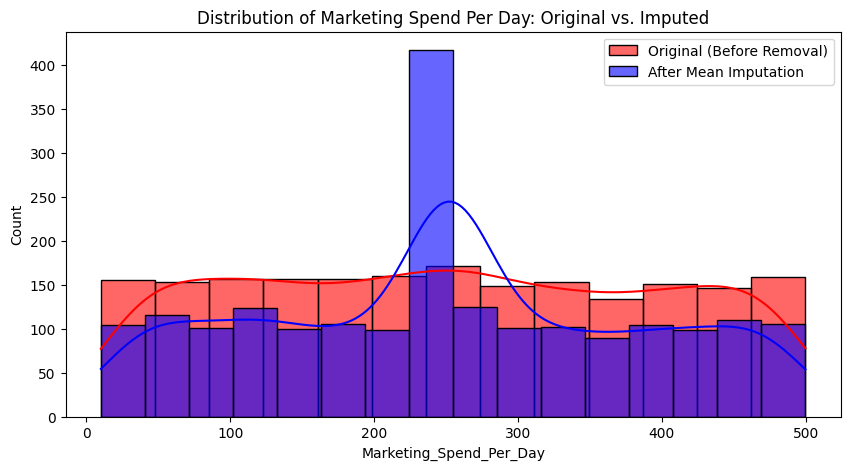

In [16]:
'''
Evaluate using a distribution comparison.
'''
# Original (non-missing) and imputed data
original_values = df.copy(deep = True)['Marketing_Spend_Per_Day']  # The values we removed originally
imputed_values = df_copy['Marketing_Spend_Per_Day']

# Plot Distribution Before & After Imputation
plt.figure(figsize=(10, 5))
sns.histplot(original_values, kde=True, color='red', label="Original (Before Removal)", alpha=0.6)
sns.histplot(imputed_values, kde=True, color='blue', label="After Mean Imputation", alpha=0.6)
plt.legend()
plt.title("Distribution of Marketing Spend Per Day: Original vs. Imputed")
plt.show()

# Results
The evaluation shows that the imputation method may not have been effective. We had a uniform distribution, and using the mean values increased the present of mean values, and added a peak. 

# Imputation Method 3: Similarity-Based Imputation (Multivariate)
Similarity-Based Imputation uses KNN to find the nearest neighbours and impute values based on their attribute values.

## Missing Not At Random (MNAR)
Missing Not At Random means values for an attribute are not removed at random, but they are not correlated to other attributes.

## Attribute: Location_Foot_Traffic
### Approach
- We will remove values for `Location_Foot_Traffic` that have extremely high or low values.
- We will ues KNN imputation to find similar rows and use their values to estimate the missing values. 

In [17]:
'''
Simulate removing values for an attribute not at random. 
We'll remove the top 10% and lowest 10% of values.
'''
df_copy = df.copy(deep = True)

# Thresholds
high = df_copy['Location_Foot_Traffic'].quantile(0.90)
low = df_copy['Location_Foot_Traffic'].quantile(0.10)

removed_indices = df_copy[(df_copy['Location_Foot_Traffic'] > high) | (df_copy['Location_Foot_Traffic'] < low)].index
original_values = df_copy.loc[removed_indices, 'Location_Foot_Traffic']

# Remove values based on thresholds
df_copy.loc[removed_indices, 'Location_Foot_Traffic'] = np.nan

missing_percentage = df_copy['Location_Foot_Traffic'].isnull().mean() * 100
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        1603 non-null   float64
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 109.5 KB


In [18]:
'''
Use KNN to impute values.
'''
# Select numerical features for imputation
numerical_features = ['Number_of_Customers_Per_Day', 'Daily_Revenue', 'Marketing_Spend_Per_Day', 
                      'Operating_Hours_Per_Day', 'Number_of_Employees', 'Average_Order_Value', 'Location_Foot_Traffic']

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Apply KNN to the dataset
df_copy[numerical_features] = knn_imputer.fit_transform(df_copy[numerical_features])

# Verify that missing values are imputed
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   float64
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   float64
 3   Number_of_Employees          2000 non-null   float64
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   float64
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB



Evaluation Metrics:
Mean Squared Error (MSE): 190541.58
Mean Absolute Error (MAE): 423.59


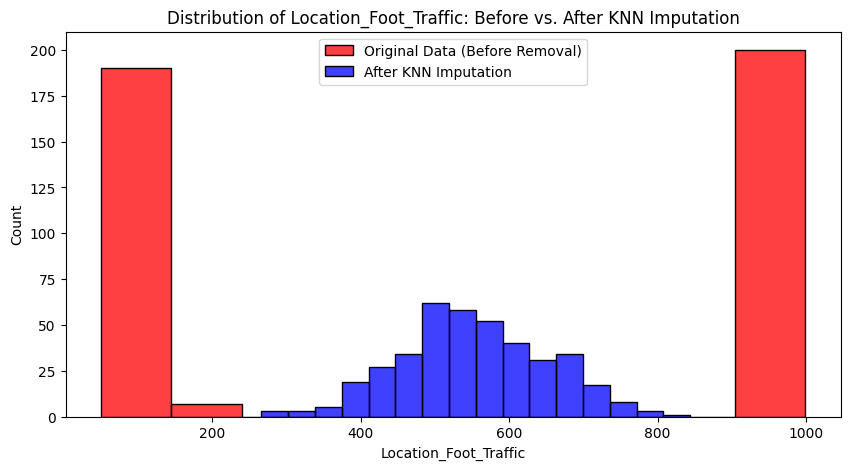

In [19]:
'''
Evaluate imputation.
'''
# Extract imputed values
imputed_values = df_copy.loc[removed_indices, 'Location_Foot_Traffic']

# Compute MSE & MAE
mse = mean_squared_error(original_values, imputed_values)
mae = mean_absolute_error(original_values, imputed_values)

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Compare distributions before and after imputation
plt.figure(figsize=(10, 5))
sns.histplot(original_values, color='red', label="Original Data (Before Removal)")
sns.histplot(imputed_values, color='blue', label="After KNN Imputation")
plt.legend()
plt.title("Distribution of Location_Foot_Traffic: Before vs. After KNN Imputation")
plt.show()

# Conclusion
We performed 3 imputation strategies to evaluate univariate, bivariate, and multivariate data. We used correlational imputation, default-value imputation, and similarity based imputation. The detailed results are found above.

## References
- Week 6: Missing Data Lecture Materials
- ChatGPT Prompts:
  - "How do we perform a KNN Imputation?"
  - "How can we evaluate an imputation using distribution comparison? How can we do it using mean squared error?"